# KNN with IRIS
I will use the famous iris data set for this project. It's a small data set with flower features that can be used to attempt to predict the species of an iris flower.

In [19]:
library(ISLR)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [20]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [21]:
print(c(var(iris[,1]), var(iris[,2])))

[1] 0.6856935 0.1899794


In [22]:
df <- scale(iris[, -5])
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


In [23]:
print(c(var(df[,1]), var(df[,2])))

[1] 1 1


In [24]:
dim(df)

[1] 150   4

In [26]:
class(iris$Species)

[1] "factor"

In [30]:
df <- cbind.data.frame(df, Species=iris$Species)

In [32]:
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.8976739,1.01560199,-1.335752,-1.311052,setosa
-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
-1.3807271,0.32731751,-1.392399,-1.311052,setosa
-1.5014904,0.09788935,-1.279104,-1.311052,setosa
-1.0184372,1.24503015,-1.335752,-1.311052,setosa
-0.5353840,1.93331463,-1.165809,-1.048667,setosa


In [33]:
library(caTools)

In [37]:
set.seed(101)
sample <- sample.split(df$Species, SplitRatio = 0.7)

In [38]:
sample

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
 [13] FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [25] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [37]  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
 [49] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [61] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE
 [73]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[109] FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE
[145] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [42]:
train <- df[sample==T,]
test <- df[sample==F,]

In [44]:
library(class)
pred <- knn(train[, 1:4], test[, 1:4], train[, 5], k = 1)

In [45]:
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor virginica  versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [46]:
error <- mean(test[, 5] != pred)
error

[1] 0.04444444

In [47]:
errors <- c()
for (i in 1:20) {
    pred <- knn(train[, 1:4], test[, 1:4], train[, 5], k = i)
    errors[i] <- mean(test[, 5] != pred)
}
print(errors)

 [1] 0.04444444 0.06666667 0.02222222 0.02222222 0.02222222 0.04444444
 [7] 0.04444444 0.04444444 0.04444444 0.02222222 0.02222222 0.02222222
[13] 0.02222222 0.02222222 0.02222222 0.02222222 0.02222222 0.02222222
[19] 0.02222222 0.02222222


In [48]:
errors_df <- data.frame(K=1:20, Error=errors)
head(errors_df)

K,Error
1,0.04444444
2,0.06666667
3,0.02222222
4,0.02222222
5,0.02222222
6,0.04444444


In [49]:
library(ggplot2)

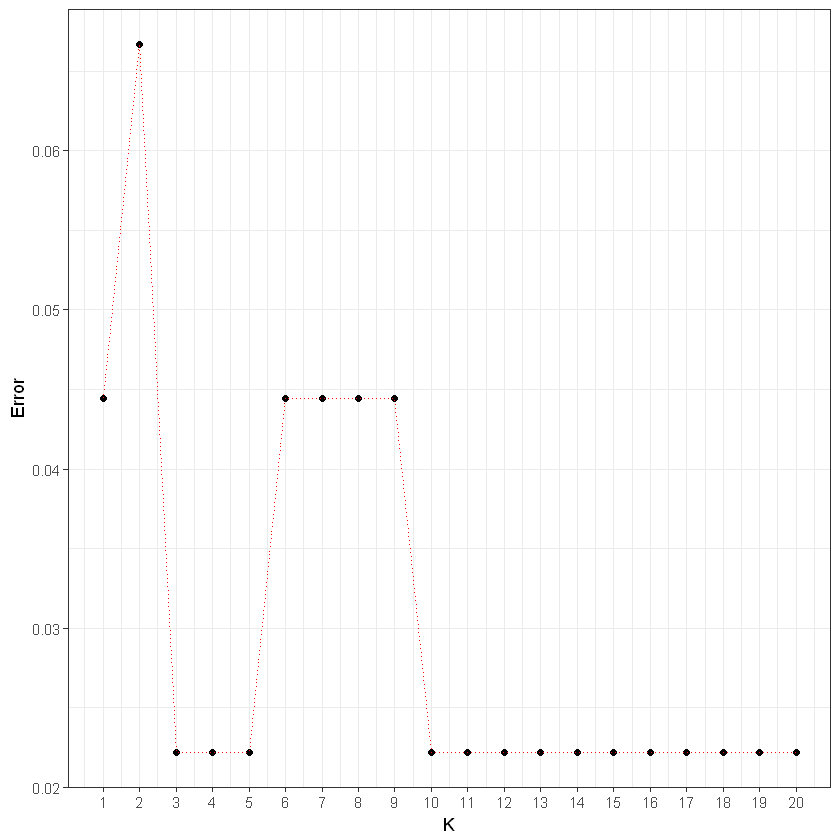

In [57]:
ggplot(errors_df, aes(K, Error)) + geom_point() + geom_line(lty=3, color='red') + theme_bw() + scale_x_continuous(breaks = 1:20)

In [58]:
# Use Elbow method to choose K
pred <- knn(train[, 1:4], test[, 1:4], train[, 5], k = 3)
mean(test[, 5] != pred)

[1] 0.02222222

In [59]:
table(test[, 5], pred)

            pred
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         1
  virginica       0          0        15